
test: constant



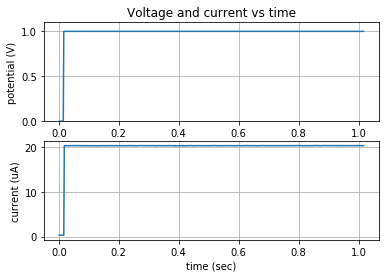

In [1]:
from potentiostat import Potentiostat
import matplotlib.pyplot as plt
import numpy as np

port = 'COM6'    # Serial port for potentiostat device
datafile = 'data.txt'    # Name of output data file

test_name = 'constant'   # Name of test to run - constant volate voltammetery
curr_range = '100uA'     # Name of current range for test [-100uA, +100uA]
sample_rate = 10.0      # Rate (samples/sec) at which to collect samples 
duration = 1            # minutes
duration = duration*60*1000 #convert time to ms
voltage = 1.0

test_param = { 
        'quietValue' : 0.0,        # Output voltage during quiet peroid
        'quietTime'  : 1000,       # Duration of quiet period (ms)
        'value'      : voltage,        # Output voltage (V) during constant voltage test
        'duration'   : duration,       # Duration of constant voltage test (ms)
        }

# Create Device object and set sample rate, current range and test parameters
dev = Potentiostat(port)             
dev.set_sample_rate(sample_rate)   
dev.set_curr_range(curr_range)     
dev.set_param(test_name,test_param)

# Run constant voltammetry test
t,volt,curr = dev.run_test(test_name,display='pbar',filename=datafile)
t = np.array(t)/60    #output time in minutes

# plot results using matplotlib
plt.subplot(211)
plt.title('Voltage and current vs time')
plt.plot(t,volt)
plt.ylabel('potential (V)')
plt.ylim(0,test_param['value']*1.1)
plt.grid('on')

plt.subplot(212)
plt.plot(t,curr)
plt.ylabel('current (uA)')
plt.xlabel('time (min)')
plt.grid('on')

plt.show()
